# Victor Vinicius de Lima Cunha - E01066

### DOM HELDER ESCOLA SUPERIOR - CIÊNCIA DA COMPUTAÇÃO
#### II AVALIAÇÃO PARCIAL - 25
#### Introdução à Inteligência Artificial - PROF. FISCHER STEFAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
disease = pd.read_csv('diabetes.csv')

In [3]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
disease.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

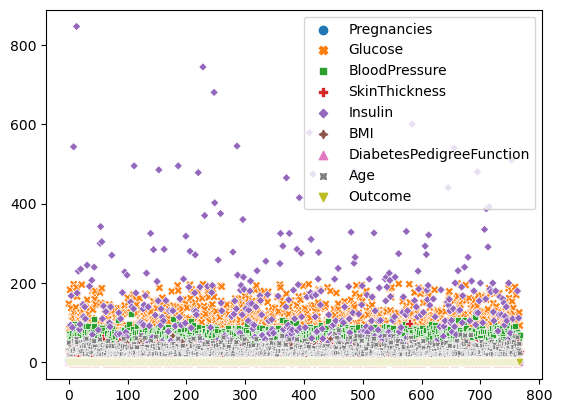

In [26]:
sns.scatterplot(data=disease)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(disease.drop('Outcome',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(disease.drop('Outcome',axis=1))

In [8]:
disease_feat = pd.DataFrame(scaled_features,columns=disease.columns[:-1])
disease_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


<AxesSubplot:>

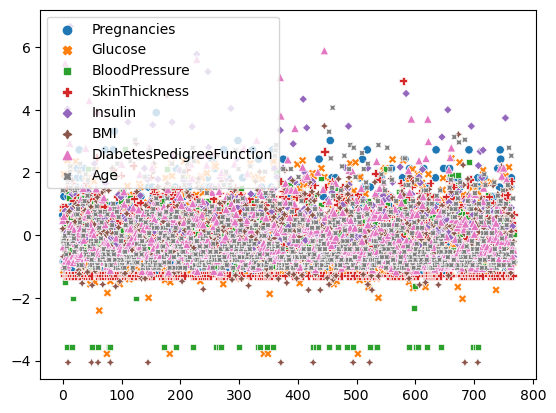

In [27]:
sns.scatterplot(data=disease_feat)

### Train Test Split
#### Use train_test_split to split your data into a training set and a testing set.

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X = disease_feat
y = disease['Outcome']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Apply Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)

### Creating Metrics

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,y_pred))

[[133  17]
 [ 32  49]]


In [25]:
target_names = ['without disease', 'with disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

without disease       0.81      0.89      0.84       150
   with disease       0.74      0.60      0.67        81

       accuracy                           0.79       231
      macro avg       0.77      0.75      0.76       231
   weighted avg       0.78      0.79      0.78       231



### Question 1

#### 1) Qual e é a precisão deste modelo e como você a interpreta?

#### 2) Qual a diferença entre precisão e acurácia (precision and accuracy)?

#### 3) Porque foi necessário usar a função StandardScaler()?

1) A precisão do modelo pode ser vista através do classification_report e é distinta para cada classe avaliada, sendo elas, without disease com precisão de 81%, e with disease com precisão de 74%.
Eu interpreto que o modelo está com uma precisão decente no que se refere a identificar casos onde o paciente não está doente, embora não seja excelente. Já que a precisão de 81% na classe "Without disease" indica que o modelo tende a acertar suas predições quando prediz que o indivíduo não está doente.

    O problema é que a precisão da classe "With disease" está bem baixa, e isso pode causar riscos aos pacientes cuja situação foi predita como doente, pois podem ocorrer complicações caso o tratamento seja iniciado em um paciente acusado por um falso positivo


2) O precision representa, de forma resumida, dentre todas as classificações de classe positiva que o modelo fez, quantas estão corretas. e é definido individualmente para todas as classes avaliadas. Já a acurácia é a taxa de acertos do modelo, e leva em consideração quandos verdadeiros positivos e quantos verdadeiros negativos foram obtidos, do total de predições realizadas.

3) porque a escala dos dados está muito distinta, e isso pode atrapalhar com a performance da regressão logistica, em específico pode-se comparar as variáveis glucose e DiabetesPedigreeFunction que estão claramente distintas, ao rodar um:

    sns.scatterplot(data=disease)

    e um

    sns.scatterplot(data=disease_feat)
    
    podemos ver a diferença notável do StandartScaler()    

### Question 2

#### 1) Construa KNN para o mesmo conjunto de dados 
   #### (lembre-se de que os dados estão normalizados)
   #### (lembre-se de construir o gráfico para avaliar o passo k)
    
#### 2) Qual dos dois modelos prediz melhor o resultado (Explique seu raciocínio)


2) após fazer testes com todas as possibilidades de k para os dados disponíveis, foi escolhido o valor de k=27 pois ao plotar um gráfico da taxa de erros, apresenta um valor baixo de erros e os valores ao redor não estão muito variados.

    Nesse caso em questão, temos que os dois modelos são extremamente similares, e que como a quantidade de dados que temos não é muito alta, não é tão fácil decidir um modelo em relação ao outro, então na necessidade de escolher um dos modelos, eu diria que o KNN apresenta um resultado melhor, pois possuí uma acurácia maior, embora a f1-score seja um pouco mais baixa

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
error_rate = []

# Will take some time
for i in range(1,231):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

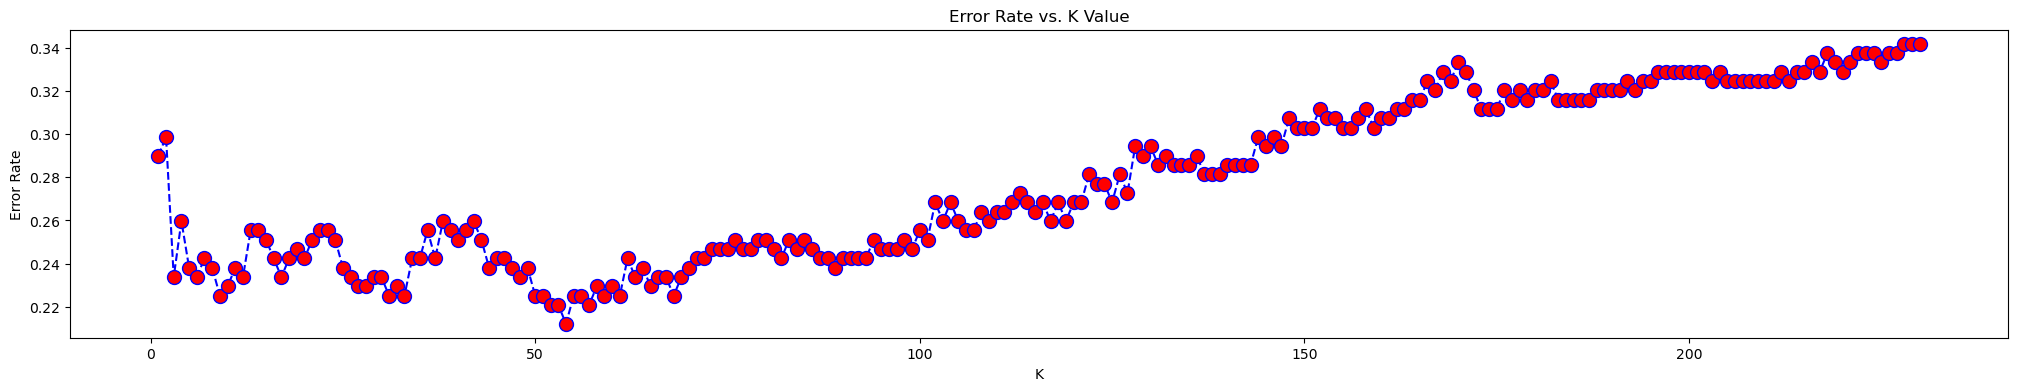

In [33]:
plt.figure(figsize=(25,4))
plt.plot(range(1,231),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

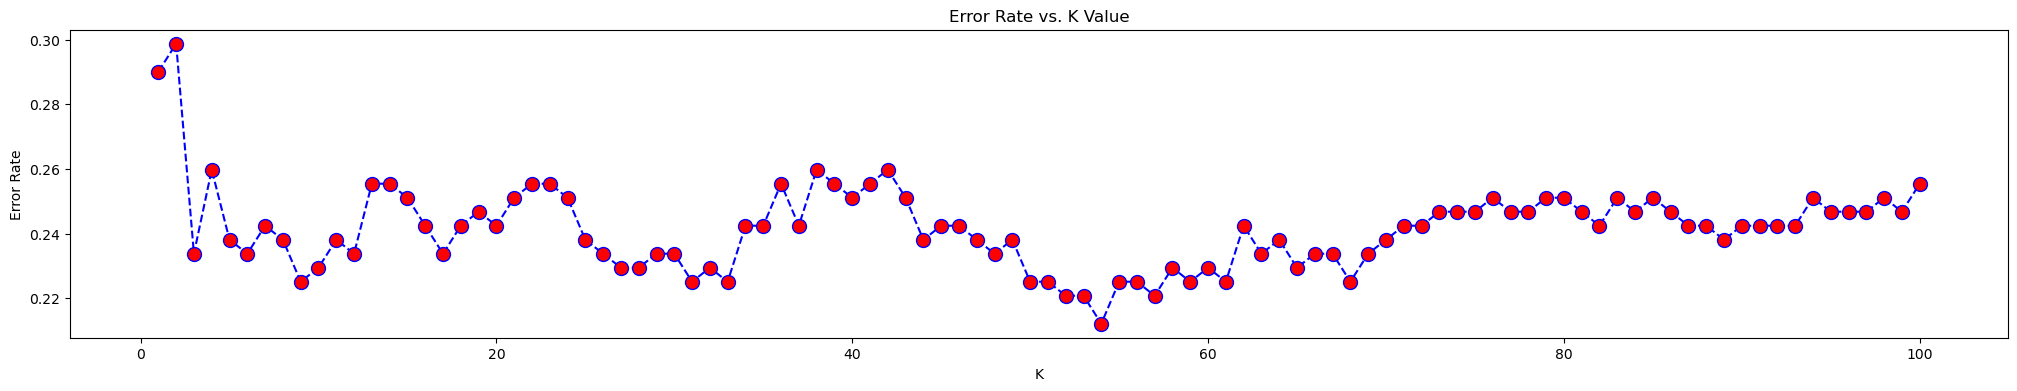

In [35]:
plt.figure(figsize=(25,4))
plt.plot(range(1,101),error_rate[:100],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=90')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=90


[[136  14]
 [ 39  42]]


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.52      0.61        81

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.77      0.76       231



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Question 3

#### Reproduza os resultados abaixo e responda às perguntas

In [43]:
bank = pd.read_csv('bank_test.csv')

In [44]:
bank.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,26,technician,single,professional.course,no,no,no,telephone,oct,mon,1,16,1,success,-1.1,94.601,-49.5,0.977,4963.6
1,1,48,management,married,university.degree,no,no,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
2,2,33,blue-collar,single,high.school,no,no,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
3,3,69,retired,divorced,basic.4y,no,no,no,cellular,apr,mon,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,4,43,admin.,married,high.school,no,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0


In [45]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14416 entries, 0 to 14415
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              14416 non-null  int64  
 1   age             14416 non-null  int64  
 2   job             14416 non-null  object 
 3   marital         14416 non-null  object 
 4   education       14416 non-null  object 
 5   default         14416 non-null  object 
 6   housing         14416 non-null  object 
 7   loan            14416 non-null  object 
 8   contact         14416 non-null  object 
 9   month           14416 non-null  object 
 10  day_of_week     14416 non-null  object 
 11  campaign        14416 non-null  int64  
 12  pdays           14416 non-null  int64  
 13  previous        14416 non-null  int64  
 14  poutcome        14416 non-null  object 
 15  emp.var.rate    14416 non-null  float64
 16  cons.price.idx  14416 non-null  float64
 17  cons.conf.idx   14416 non-null 

In [46]:
bank.drop(bank.columns[[0]], axis=1, inplace=True)

In [47]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,26,technician,single,professional.course,no,no,no,telephone,oct,mon,1,16,1,success,-1.1,94.601,-49.5,0.977,4963.6
1,48,management,married,university.degree,no,no,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
2,33,blue-collar,single,high.school,no,no,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0
3,69,retired,divorced,basic.4y,no,no,no,cellular,apr,mon,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
4,43,admin.,married,high.school,no,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0


In [48]:
bank.drop(bank.columns[[1,2,3,5,7,8,9,10,11,12,13,14,17,18]], axis=1, inplace=True)

In [49]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14416 entries, 0 to 14415
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             14416 non-null  int64  
 1   default         14416 non-null  object 
 2   loan            14416 non-null  object 
 3   cons.price.idx  14416 non-null  float64
 4   cons.conf.idx   14416 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 563.2+ KB


In [50]:
bank.head()

,age,default,loan,cons.price.idx,cons.conf.idx
0,26,no,no,94.601,-49.5
1,48,no,no,94.465,-41.8
2,33,no,no,93.994,-36.4
3,69,no,no,93.075,-47.1
4,43,no,no,93.994,-36.4


In [51]:
bank['default'] = bank['default'].map({'no':0,'yes':1,'unknown':0})
bank['loan'] = bank['loan'].map({'no':0,'yes':1,'unknown':0})

In [52]:
bank.head()

,age,default,loan,cons.price.idx,cons.conf.idx
0,26,0,0,94.601,-49.5
1,48,0,0,94.465,-41.8
2,33,0,0,93.994,-36.4
3,69,0,0,93.075,-47.1
4,43,0,0,93.994,-36.4


### Train Test Split
#### Use train_test_split to split your data into a training set and a testing set.
#### O alvo é a coluna 'loan' (empréstimo): queremos saber se empresta ou não.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank.drop('loan', axis=1),bank['loan'],test_size=0.301, random_state=101)

### Apply Random Forest


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [101]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = rfc.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8361751152073733


In [97]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8403456902433477


In [59]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Vizualization

In [60]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [61]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = randfor.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

NameError: name 'randfor' is not defined

### Results

In [106]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3618   46]
 [ 670    6]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3664
           1       0.12      0.01      0.02       676

    accuracy                           0.84      4340
   macro avg       0.48      0.50      0.46      4340
weighted avg       0.73      0.84      0.77      4340



              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3654
           1       0.13      0.01      0.02       671

    accuracy                           0.84      4325
   macro avg       0.49      0.50      0.46      4325
weighted avg       0.73      0.84      0.77      4325



In [107]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,3618,46,3664
1,670,6,676
All,4288,52,4340


### Como você usa estes resultados para predizer uma aplicação para empréstimo? Dê um exemplo.

O exemplo apresentado é rudimentar, mas demonstra um modo de usar o modelo treinado, na qual dados novos são passados para o modelo, e o mesmo gera uma resposta

In [119]:
df = pd.DataFrame()
df['age'] = [33]
df['default'] = [0]
df['cons.price.idx'] = [93.022]
df['cons.conf.idx'] = [-33]
df.columns = [['age','default','cons.price.idx','cons.conf.idx']]
predict = rfc.predict(df)
predict[0]
#X_test

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

### Question 4

#### Você aplicaria SVM para resolver este problema? Justifique, fundamentando sua resposta, 
#### com base na literatura..

O SVM é um modelo que se destaca quando está trabalhando com um dataset de alta complexidade, mas de pequeno ou médio porte, o que não é o caso com o dataset em questão, pois o número de atributos é muito baixo quando comparado com a quantidade de dados presentes.
portanto eu não utilizaria o SVM no problema em questão, talvez por motivo de comparação e testes.